# FY3C MWRI 海冰密集度

In [1]:
from RSData import *
from HaiYangData import *
import glob
import cmaps

In [9]:

files = glob.glob(r'G:\icecon\micosoft\FY-3C\2016\*.HDF')
latlon_file = r'E:\python_workfile\polar_project\FY3C_MWRI\lat_lon.h5'



In [6]:
fy_mwri = HaiYangData(satellite='FY3C', sensor='MWRI',resolution=25000)


# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")

transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

In [7]:
grid_array = np.zeros((fy_mwri.nlat,fy_mwri.nlon))
grid_num_array = np.zeros((fy_mwri.nlat,fy_mwri.nlon))

In [10]:
with Dataset(latlon_file, mode='r') as fh:
    lats = fh.variables['Latitude'][:]
    lons = fh.variables['Longitude'][:]

with Dataset(files[183], mode='r') as fh:
    sic = fh.variables['icecon_north_avg'][:]

In [11]:
files[183]

'G:\\icecon\\micosoft\\FY-3C\\2016\\FY3C_MWRIX_GBAL_L2_SIC_MLT_PSG_20160702_POAD_012KM_MS.HDF'

In [12]:
projlats, projlons = transformer.transform(lats, lons)

value_array = np.empty(shape=(lons.shape[0], lons.shape[1],5))

value_array[:,:,0] = lats
value_array[:,:,1] = lons
value_array[:,:,2],value_array[:,:,3] = transformer.transform(value_array[:,:,0], value_array[:,:,1])
value_array[:,:,4] = sic

x = (value_array[:,:,2] / fy_mwri.resolution).astype(np.int)
y = (value_array[:,:,3] / fy_mwri.resolution).astype(np.int)


In [13]:

grid_array[y,x] += value_array[:,:,4]
grid_num_array[y,x] += 1
# 获得XYmgrid

grid_array = grid_array / grid_num_array

<ipython-input-13-a02ab73e3985>:5: RuntimeWarning: invalid value encountered in true_divide
  grid_array = grid_array / grid_num_array


In [14]:
# num_grid = HaiYangData.get_zeros_grid(self.nlat, self.nlon)
# grid_array = HaiYangData.get_nan_grid(self.nlat, self.nlon,5)
x_map, y_map = fy_mwri.get_map_grid(transformer_back)


In [21]:
# 将非法点置为np.nan
grid_array[grid_array>101] = np.nan
grid_array[grid_array== 0] = np.nan

<ipython-input-23-b22b8b652513>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmax = 100,vmin=0,latlon = True)


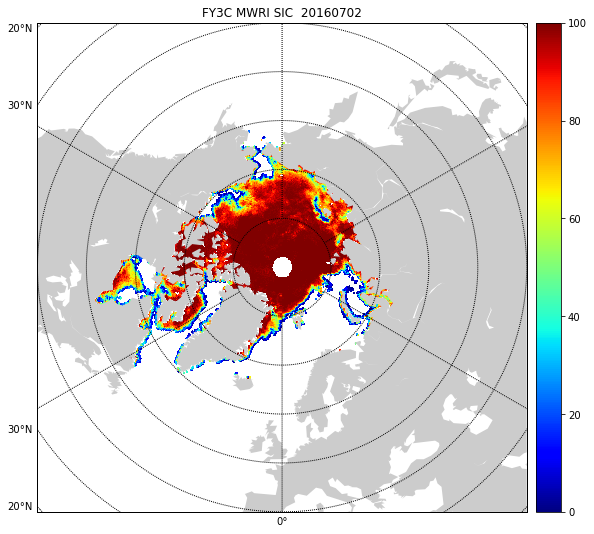

In [23]:
plt.figure(figsize=(16, 9))
hy_m = Basemap(projection='npaeqd', boundinglat=40, lon_0=0, resolution='c')
hy_m.pcolormesh(x_map, y_map, data=grid_array, cmap=plt.cm.jet,vmax = 100,vmin=0,latlon = True)
hy_m.colorbar(location='right')
hy_m.fillcontinents()
hy_m.drawmapboundary()
hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
plt.title("FY3C MWRI SIC  20160702")
plt.show()
plt.close()